


# Interpolación polinomial 

## Polinomios de lagrange  

**¿Cuantos puntos necesitamos para interpolar un polinomio de grado n?**


Por ejemplo queremos encontrar el polinomio que interpola los puntos $(x_0,y_0)$ y $(x_1,y_1)$

Un polinomio de primer grado es de la forma $y = mx + b$, lo podemos calcular de la siguiente manera:

$$P_1(x) = \frac{(x-x_1)}{(x_0-x_1)}y_0 + \frac{(x-x_0)}{(x_1-x_0)}y_1$$

Note que este polinomio es único y si lo simplificamos coincide en la forma $y = mx + b$

Ahora si queremos encontrar el polinomio de grado 2 que pasa por los puntos $(x_0,y_0)$, $(x_1,y_1)$ y $(x_2,y_2)$, lo podemos calcular de la siguiente manera:
$$P_2(x) = \frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)}y_0 + \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)}y_1 + \frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)}y_2$$

De forma general, el polinomio de grado n que pasa por los puntos $(x_0,y_0),(x_1,y_1),...,(x_n,y_n)$ se puede calcular de la siguiente manera:

$$P_n(x) = \sum_{i=0}^{n} y_i \prod_{j=0,j\neq i}^{n} \frac{(x-x_j)}{(x_i-x_j)}$$

Este polinomio es único y se le conoce como polinomio de Lagrange. 

**¿Cual es la complejidad de calcular el polinomio de Lagrange?**

Para calcular el polinomio de Lagrange necesitamos calcular n productos y n sumas, por lo que la complejidad es $O(n^2)$

**¿Cual es el problema de calcular el polinomio de Lagrange?**

El problema de calcular el polinomio de Lagrange es que si queremos agregar un punto adicional, necesitamos recalcular todo el polinomio, lo que puede ser muy costoso.

## Ejercicio 

Dado los puntos $(1,2),(3,5)$ y $(4,7)$, encuentre el polinomio de Lagrange que pasa por estos puntos. (Sin usar computador)



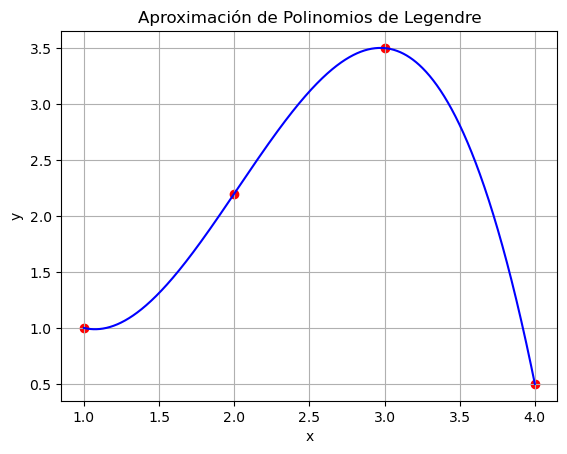

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.legendre import Legendre

# Define los puntos
x_points = np.array([1, 2, 3, 4])
y_points = np.array([1, 2.2, 3.5, 0.5])  # Cambia estos valores según tus puntos

# Ajusta los polinomios de Legendre
coeff = np.polynomial.legendre.legfit(x_points, y_points, deg=3)

# Crea un objeto de polinomio de Legendre con los coeficientes ajustados
leg_poly = Legendre(coeff)

# Crea un rango de valores de x para la gráfica
x = np.linspace(min(x_points), max(x_points), 1000)

# Calcula los valores de y para la gráfica
y = leg_poly(x)

# Grafica los puntos originales
plt.scatter(x_points, y_points, color='red')

# Grafica el polinomio de Legendre
plt.plot(x, y, color='blue')

plt.title('Aproximación de Polinomios de Legendre')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


# Diferencias de Newton

Las diferencias de Newton son una forma más eficiente de calcular el polinomio interpolante de Newton.
Para esto necesitamos calcular los coeficientes de la siguiente forma:

Podemos redefinir los polinomios de la siguiente forma:

$$P_1(x)=b_0 + b_1(x-x_0)$$

Queremos encontrar el polinomio de grado 1 que pasa por los puntos $(x_0,y_0)$ y $(x_1,y_1)$,

D esta forma queremos encontrar los coeficiente $b_0$ y $b_1$ tal que $P_1(x_0)=y_0$ y $P_1(x_1)=y_1$

$$P_1(x_0)=b_0 + b_1(x_0-x_0)=b_0=y_0$$
$$P_1(x_1)=b_0 + b_1(x_1-x_0)=b_0+b_1(x_1-x_0)=y_1$$
$$b_1=\frac{y_1-y_0}{x_1-x_0}$$


Ahora si agregamos un punto adicional $(x_2,y_2)$, queremos encontrar el polinomio de grado 2 que pasa por los puntos $(x_0,y_0)$, $(x_1,y_1)$ y $(x_2,y_2)$, podemos definir el polinomio de la siguiente forma:


$$P_2(x)=b_0 + b_1(x-x_0) + b_2(x-x_0)(x-x_1)$$

Note que $b_0$ y $b_1$ ya los conocemos, por lo que solo necesitamos encontrar $b_2$ tal que $P_2(x_2)=y_2$

$$P_2(x_2)=b_0 + b_1(x_2-x_0) + b_2(x_2-x_0)(x_2-x_1)=y_2$$
$$b_2=\frac{y_2-b_0-b_1(x_2-x_0)}{(x_2-x_0)(x_2-x_1)}$$


sustituyendo $b_0$ y $b_1$ en la ecuación anterior, obtenemos:

$$b_2=\frac{y_2-y_0-\frac{y_1-y_0}{x_1-x_0}(x_2-x_0)}{(x_2-x_0)(x_2-x_1)}$$
$$b_2=\frac{y_2-y_1+y_1-y_0-\frac{y_1-y_0}{x_1-x_0}(x_2-x_0)}{(x_2-x_0)(x_2-x_1)}$$
$$b_2=\frac{\frac{y_2-y_1}{x_2-x_1}(x_2-x_1)+y_1-y_0-\frac{y_1-y_0}{x_1-x_0}(x_2-x_0)}{(x_2-x_0)(x_2-x_1)}$$
$$b_2=\frac{\frac{y_2-y_1}{x_2-x_1}(x_2-x_1)+\frac{(y_1-y_0)(x_1-x_0)}{x_1-x_0}-\frac{y_1-y_0}{x_1-x_0}(x_2-x_0)}{(x_2-x_0)(x_2-x_1)}$$
$$b_2=\frac{\frac{y_2-y_1}{x_2-x_1}(x_2-x_1)-\frac{y_1-y_0}{x_1-x_0}(x_2-x_1)}{(x_2-x_0)(x_2-x_1)}$$
$$b_2=\frac{\frac{y_2-y_1}{x_2-x_1}-\frac{y_1-y_0}{x_1-x_0}}{x_2-x_0}$$



De forma similar si queremos encontrar el polinomio de grado n que pasa por los puntos $(x_0,y_0),(x_1,y_1),...,(x_n,y_n)$, podemos definir el polinomio de la siguiente forma:

$$P_n(x)=b_0 + b_1(x-x_0) + b_2(x-x_0)(x-x_1) + ... + b_n(x-x_0)(x-x_1)...(x-x_{n-1})$$

Para poder calcular los coeficientes $b_0,b_1,...,b_n$ necesitamos calcular las diferencias divididas de Newton





# Diferencias divididas de newton
 Una forma más eficiente de calcular el polinomio interpolante de Newton es mediante las diferencias divididas de Newton.
 El cual consiste en calcular los coeficientes de la siguiente forma:
 $$f[x_i] = f(x_i)$$
 $$f[x_i,x_j] = \frac{f(x_i)-f(x_j)}{x_i-x_j}$$
 $$f[x_i,x_j,x_k] = \frac{f[x_i,x_j]-f[x_j,x_k]}{x_i-x_k}$$
 $$f[x_i,x_j,x_k,x_l] = \frac{f[x_i,x_j,x_k]-f[x_j,x_k,x_l]}{x_i-x_l}$$
 de forma general:
 $$f[x_n,x_{n-1},\cdots,x_1,x_0] = \frac{f[x_n,x_{n-1},\cdots,x_1]-f[x_{n-1},\cdots,x_1,x_0]}{x_n-x_0}$$


 Note que 

$$b_0 = f[x_0]$$
$$b_1 =\frac{y_1-y_0}{x_1-x_0}= f[x_1,x_0]$$
$$b_2 = \frac{\frac{y_2-y_1}{x_2-x_1}-\frac{y_1-y_0}{x_1-x_0}}{x_2-x_0}=\frac{f[x_2,x_1]-f[x_1,x_0]}{x_2-x_0}=f[x_2,x_1,x_0]$$

$$\begin{bmatrix}
x_0 & f[x_0] & f[x_1,x_0] & f[x_2,x_1,x_0] & f[x_3,x_2,x_1,x_0] \\
x_1 & f[x_1] & f[x_2,x_1] & f[x_3,x_2,x_1] & 0 \\
x_2 & f[x_2] & f[x_3,x_2] & 0 & 0 \\
x_3 & f[x_3] & 0 & 0 & 0 \\
\end{bmatrix}$$


 Así el polinomio interpolante de Newton se puede escribir como:
$$P_n(x) = f[x_0] + f[x_0,x_1](x-x_0) + f[x_0,x_1,x_2](x-x_0)(x-x_1) + ... + f[x_0,x_1,...,x_n](x-x_0)(x-x_1)...(x-x_{n-1})$$

Veamos un ejemplo:

Dados los puntos $(1,0),(2,2),(4,12),(5,23)$, encuentre el polinomio interpolante de Newton que pasa por estos puntos.


| $x_i$            | $f(x_i)$   | $f[x_i,x_{+1}]$ |$f[x_i,x_{i+1},x_{i+2}]$  |$f[x_i,x_{i+1},x_{i+2}]$|
|-------------------|-------------|---------------|--------------|--------------|
| 1   | 0    | 2             | 1         |       1/4     |
|2|  2      | 5             | 2         |--------------|
|4| 12 | 11             | --------------|--------------|
| 5| 23|--------------| --------------           |--------------|


Sea la siguiente tabla de valores:

# Algoritmo de las diferencias divididas de Newton

**Entrada**: $x_i$ y $y_i$ para $i=0,1,...,n$

**Salida**: los coeficientes $b_0,b_1,...,b_n$ del polinomio interpolante de Newton

**paso 1** Para $i=0,1,...,n$ hacer

        para j=0,1...,i
        
$$F_{ij}=\frac{F_{i,j-1}-F_{i-1,j-1}}{x_i-x_{i-j}}$$

**paso 2** Devolver $F_{n,n}$



Sea la siguiente tabla de valores:

| x | $f(x_i)$ | $f[x_i,x_i+1]$ | $f[x_i,x_i+1,x_i+2]$ | $f[x_i,x_i+1,x_i+2,x_i+3]$ |
|---|----------|----------------|----------------------|----------------------------|
| 1 | 0        | 2              | 1                    | 0                          |
| 2 | 2        | 5              | 1                    |                            |
| 4 | 12       | 8              |                      |                            |
| 5 | 20       |                |                      |                            |

Así el polinomio interpolante de Newton es:
$$c_0=f(x_0)=0$$
$$c_1=f[x_0,x_1]=2$$
$$c_2=f[x_0,x_1,x_2]=1$$
$$c_3=f[x_0,x_1,x_2,x_3]=0$$


De esta forma el polinomio interpolante de Newton es:

$$p(x)=0+2(x-1)+1(x-1)(x-2)+0(x-1)(x-2)(x-4)$$

In [5]:
def calcular_diferencias_divididas(x, y):
    n = len(x)
    diferencias = [[0] * n for _ in range(n)]

    for i in range(n):
        diferencias[i][0] = y[i]

    for j in range(1, n):
        for i in range(n - j):
            diferencias[i][j] = (diferencias[i + 1][j - 1] - diferencias[i][j - 1]) / (x[i + j] - x[i])

    return diferencias[0]

def evaluar_polynomial_newton(coeficientes, x, xi):
    n = len(coeficientes)
    resultado = coeficientes[0]
    factor = 1

    for i in range(1, n):
        factor *= (xi - x[i - 1])
        resultado += coeficientes[i] * factor

    return resultado

# Datos de ejemplo
x = [1, 2, 4,5]
y = [0, 2, 12, 23]

# Calcular las diferencias divididas
coeficientes = calcular_diferencias_divididas(x, y)
print("Los coeficientes del polinomio de Newton son:", coeficientes)

# Evaluar el polinomio de Newton en un valor específico, por ejemplo, x = 1.5
xi = 1.5
resultado = evaluar_polynomial_newton(coeficientes, x, xi)
print(f"El valor interpolado en x = {xi} es: {resultado}")



Los coeficientes del polinomio de Newton son: [0, 2.0, 1.0, 0.25]
El valor interpolado en x = 1.5 es: 0.90625


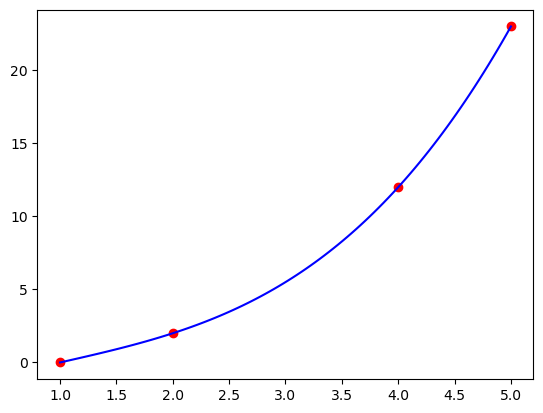

In [6]:
plt.scatter(x, y, color='red')
x_line = np.linspace(min(x), max(x), 100)
y_line = [evaluar_polynomial_newton(coeficientes, x, xi) for xi in x_line]
plt.plot(x_line, y_line, color='blue')
plt.show()

# Veamos el siguiente ejemplo 2 

| $x_1$ | $f(x_i)$ |
|-------|----------|
| 1     | 0        |
| 4     | 1.386294 |
| 6     | 1.791759 |

Encuentre el polinomio interpolante de Newton que pasa por estos puntos.

In [15]:

# Datos de ejemplo
x = [1, 4,6]
y = [0, 1.386294, 1.791759]

# Calcular las diferencias divididas
coeficientes = calcular_diferencias_divididas(x, y)
print("Los coeficientes del polinomio de Newton son:", coeficientes)

# Evaluar el polinomio de Newton en un valor específico, por ejemplo, x = 1.5
xi = 5
resultado = evaluar_polynomial_newton(coeficientes, x, xi)
print(f"El valor interpolado en x = {xi} es: {resultado}")
xi = 2
resultado = evaluar_polynomial_newton(coeficientes, x, xi)
print(f"El valor interpolado en x = {xi} es: {resultado}")



Los coeficientes del polinomio de Newton son: [0, 0.46209799999999995, -0.05187309999999997]
El valor interpolado en x = 5 es: 1.6408996
El valor interpolado en x = 2 es: 0.5658441999999999


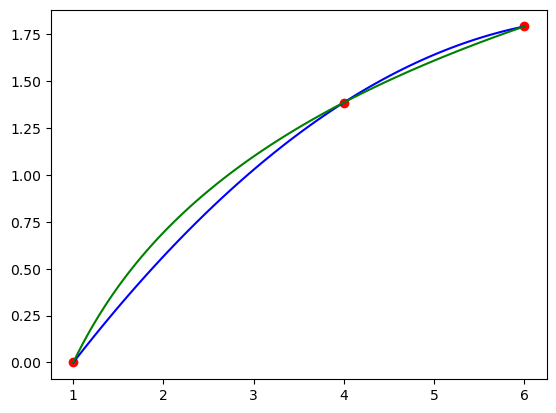

In [16]:
plt.scatter(x, y, color='red')
x_line = np.linspace(min(x), max(x), 100)
y_line = [evaluar_polynomial_newton(coeficientes, x, xi) for xi in x_line]
y_real = np.log(x_line)
plt.plot(x_line, y_line, color='blue')
plt.plot(x_line, y_real, color='green')
plt.show()

# Error de interpolación

El error de interpolación se puede calcular de la siguiente forma:

$$E(x) = \frac{f^{(n+1)}(\xi)}{(n+1)!}(x-x_0)(x-x_1)...(x-x_n)$$

Donde $\xi$ es un número real en el intervalo $[x_0,x_n]$

¿Cuál es el significado de este error?

El error de interpolación nos dice que tan cerca está el polinomio interpolante de Newton de la función real.

Según esta formula se debería conocer de antemano la función real. Por fortuna existe una formulación alternativa que no requiere conocer la función real.
Esta es usando una diferencia dividida finita para aproximar la derivada de la función real.

$$E(x) = f[x,x_n,x_{n-1}...,x_1,x_0](x-x_0)(x-x_1)...(x-x_n)$$

Ejemplo:

Estime el error en la interpolación polinomial de segundo grado del ejemplo 2. Use el punto asociado a $f(x_3)=f(5)=1.609438$ para obtener sus resultados.


In [17]:
x = [1, 4,6,5]
y = [0, 1.386294, 1.791759, 1.609438]

# Calcular las diferencias divididas
coeficientes = calcular_diferencias_divididas(x, y)
print("Los coeficientes del polinomio de Newton son:", coeficientes)

Los coeficientes del polinomio de Newton son: [0, 0.46209799999999995, -0.05187309999999997, 0.007865400000000014]


Así, el error de interpolación es:

$$E(x) = f[x_3,x_2,x_1,x_0](x-x_0) (x-x_1)(x-x_2)$$

$$E(x) = 0.007865(x-1)(x-4)(x-6)$$

Si quisiera estimar el error en $x=2$, entonces el error sería:

$$E(2) = 0.007865(2-1)(2-4)(2-6) = 0.06292$$

Note que si el error real absoluto es 
$$ |f(2)-p(2)| = |ln(2)-p(2)|=|0.693147-0.56584419| = 0.12730281$$

# Fenómeno de Runge

El fenómeno de Runge es un fenómeno que ocurre cuando se interpola una función con un polinomio de grado alto en los extremos del intervalo de interpolación.

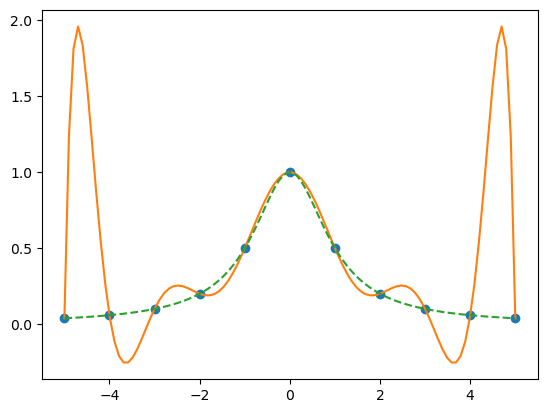

In [9]:
import numpy as np
import matplotlib.pyplot as plt
f =lambda x:1/(1+x**2)
x = np.linspace(-5,5,11) 
y = f(x)
xi=np.linspace(-5,5,100)

##
coeficientes = calcular_diferencias_divididas(x, y)
resultado = evaluar_polynomial_newton(coeficientes, x, xi)


yi=f(xi)
plt.plot(x,y,'o',xi,resultado,'-',xi,yi,'--')

# Usando códigos de Python 

Para resolver este problema usaremos la librería numpy de Python, la cual nos permite trabajar con arreglos de forma eficiente. podemos usar la función poly1d de numpy para crear un polinomio de grado n.

# Ejemplo


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# define the points
x_points = np.array([1, 3, 4])
y_points = np.array([2, 5, 7])

# fit a polynomial of degree 2 (since we have 3 points) to the data
coefficients = np.polyfit(x_points, y_points, 2)

# create a polynomial function
polynomial = np.poly1d(coefficients)

# generate x values
x_values = np.linspace(min(x_points), max(x_points), 100)

# compute the corresponding y values
y_values = polynomial(x_values)

# plot the original points
plt.scatter(x_points, y_points, color='red')
# plot the polynomial
plt.plot(x_values, y_values, color='blue')

plt.show()